In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy import stats
%load_ext autoreload
%autoreload 2
from implementations import *
from helpers import *
from cross_validation import*


In [22]:
from helpers import *
# load data.
particle, products, ids = load_csv_data('data/train.csv', sub_sample= True)

list_to_log =  [0,1,2,3,4,5, 6, 8,9, 12, 13, 16,19,21,23,24, 25,26,27,28,29]
products_logged_and_std = np.zeros(products.shape)


for i in range(30):
    if i not in list_to_log:
        products_logged_and_std[:, i] = products[:, i] -min(products[:, i]) + 1
        products_logged_and_std[:, i] = np.log(products_logged_and_std[:, i])   
    else:
        products_logged_and_std[:, i],_,_ = standardize(products[:, i])

for i in range(len(particle)):
    if (particle[i]==-1):
        particle[i]=0
        
# build sampled x and y.
seed = 1
y = np.expand_dims(particle, axis=1)
#y, X = sample_data(y, products, seed, size_samples=1000)
y, x = sample_data(y, products_logged_and_std, seed, size_samples=2000)

#x, mean_x, std_x = standardize(X)

tx = np.c_[np.ones((y.shape[0], 1)), x]

In [21]:
products.shape

(5000, 30)

### Removing features

In [3]:
number_features=x.shape[1]
corr_matrix = np.zeros((number_features,number_features))

for i in range(number_features):
    for j in range(number_features):
        corr = np.corrcoef(x[:,i], x[:,j])[1,0]
        corr_matrix[i][j]=corr

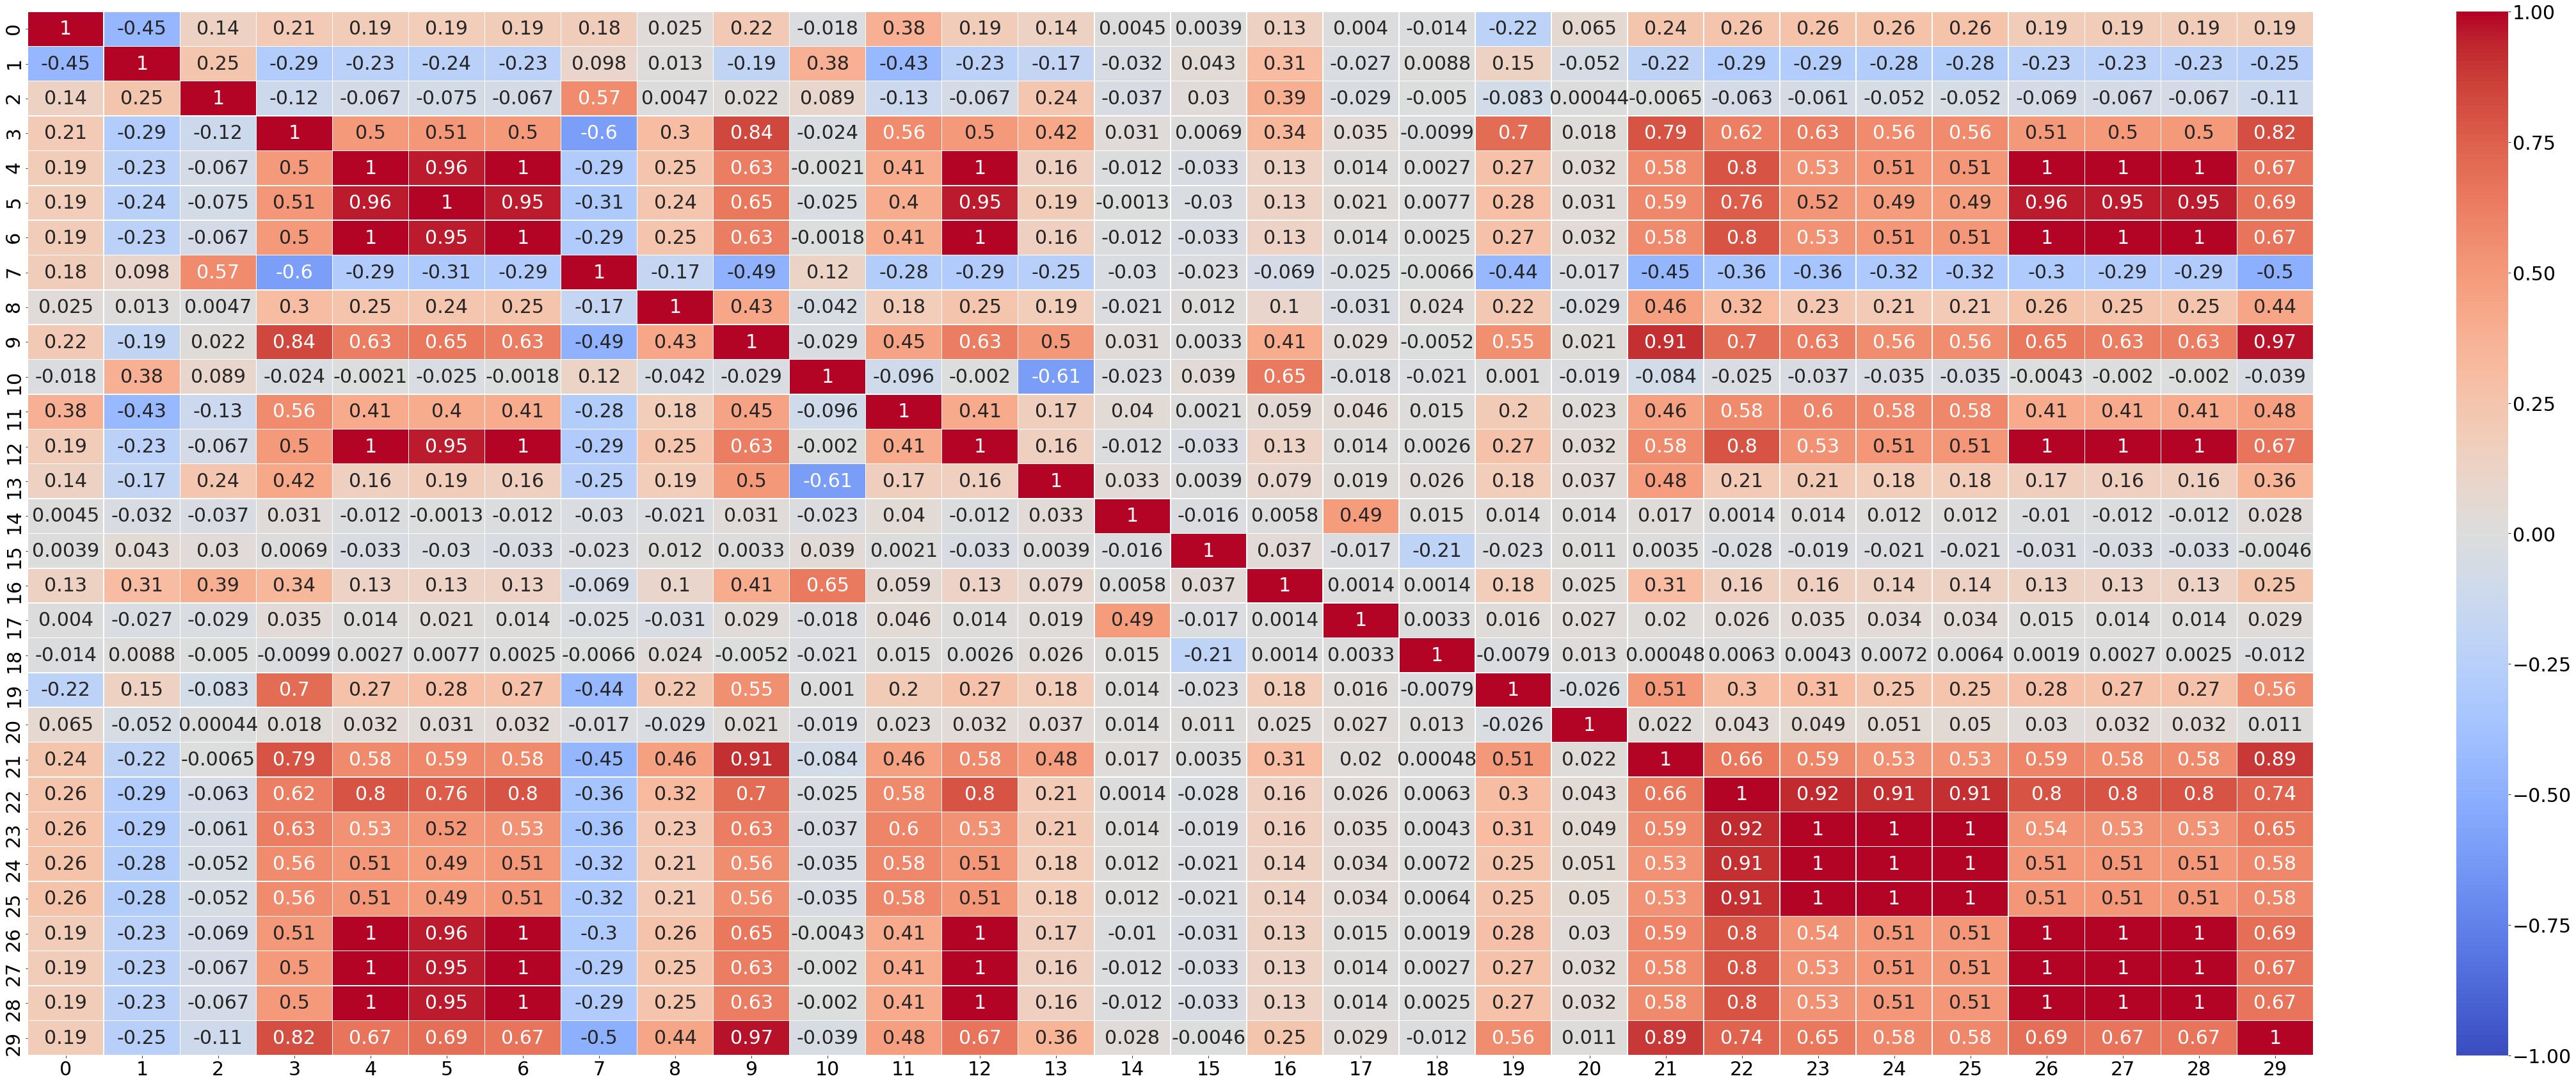

In [4]:
plt.figure(figsize=(80,30))
plt.rc('font',size=30)
sns.heatmap(corr_matrix,vmin = -1, vmax = 1, cmap = 'coolwarm',linewidths = .5, annot=True, annot_kws = {"size":30})
plt.show()

In [6]:
number_features=x.shape[1]
spearman_matrix = np.zeros((number_features,number_features))

for i in range(number_features):
    for j in range(number_features):
        spear,_ = stats.spearmanr(x[:,i],x[:,j])
        spearman_matrix[i][j]=spear

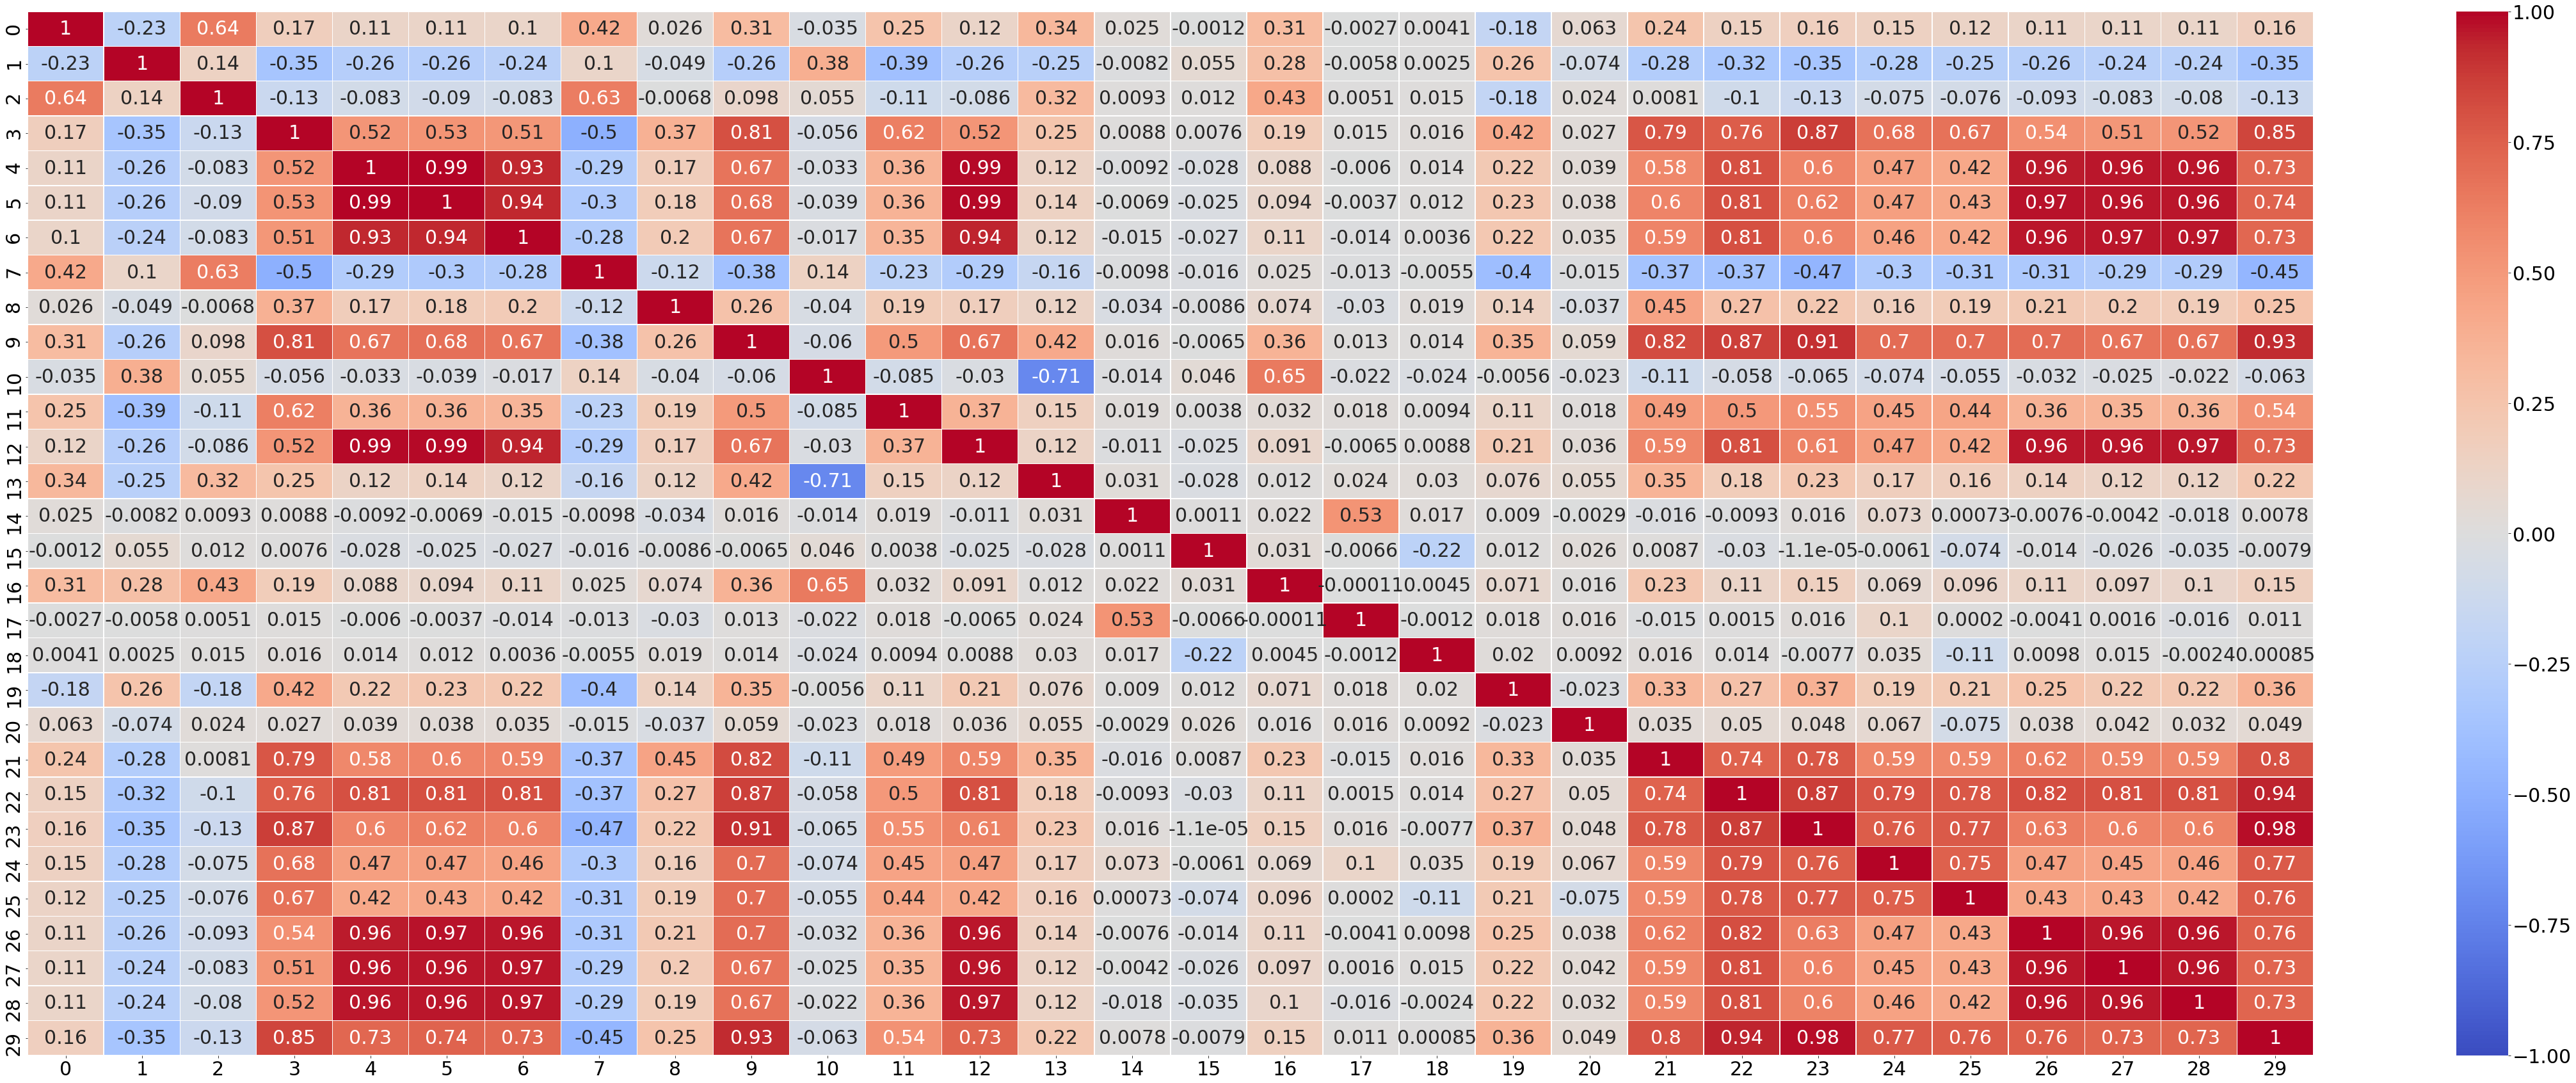

In [7]:
plt.figure(figsize=(80,30))
plt.rc('font',size=30)
sns.heatmap(spearman_matrix,vmin = -1, vmax = 1, cmap = 'coolwarm',linewidths = .5, annot=True, annot_kws = {"size":30})
plt.show()

In [8]:
# create new matrix tx for training

axis = 1 #rows (0), columns (1)
obj = [4,5,6,9,21,24,25,26,27,28,29]
x_reduced = np.delete(x,obj,axis)
tx_reduced = np.c_[np.ones((y.shape[0], 1)), x_reduced]
#more drastic
#21 to 29

In [9]:
number_features=x_reduced.shape[1]
reduced_corr_matrix = np.zeros((number_features,number_features))

for i in range(number_features):
    for j in range(number_features):
        corr = np.corrcoef(x_reduced[:,i], x_reduced[:,j])[1,0]
        reduced_corr_matrix[i][j]=corr

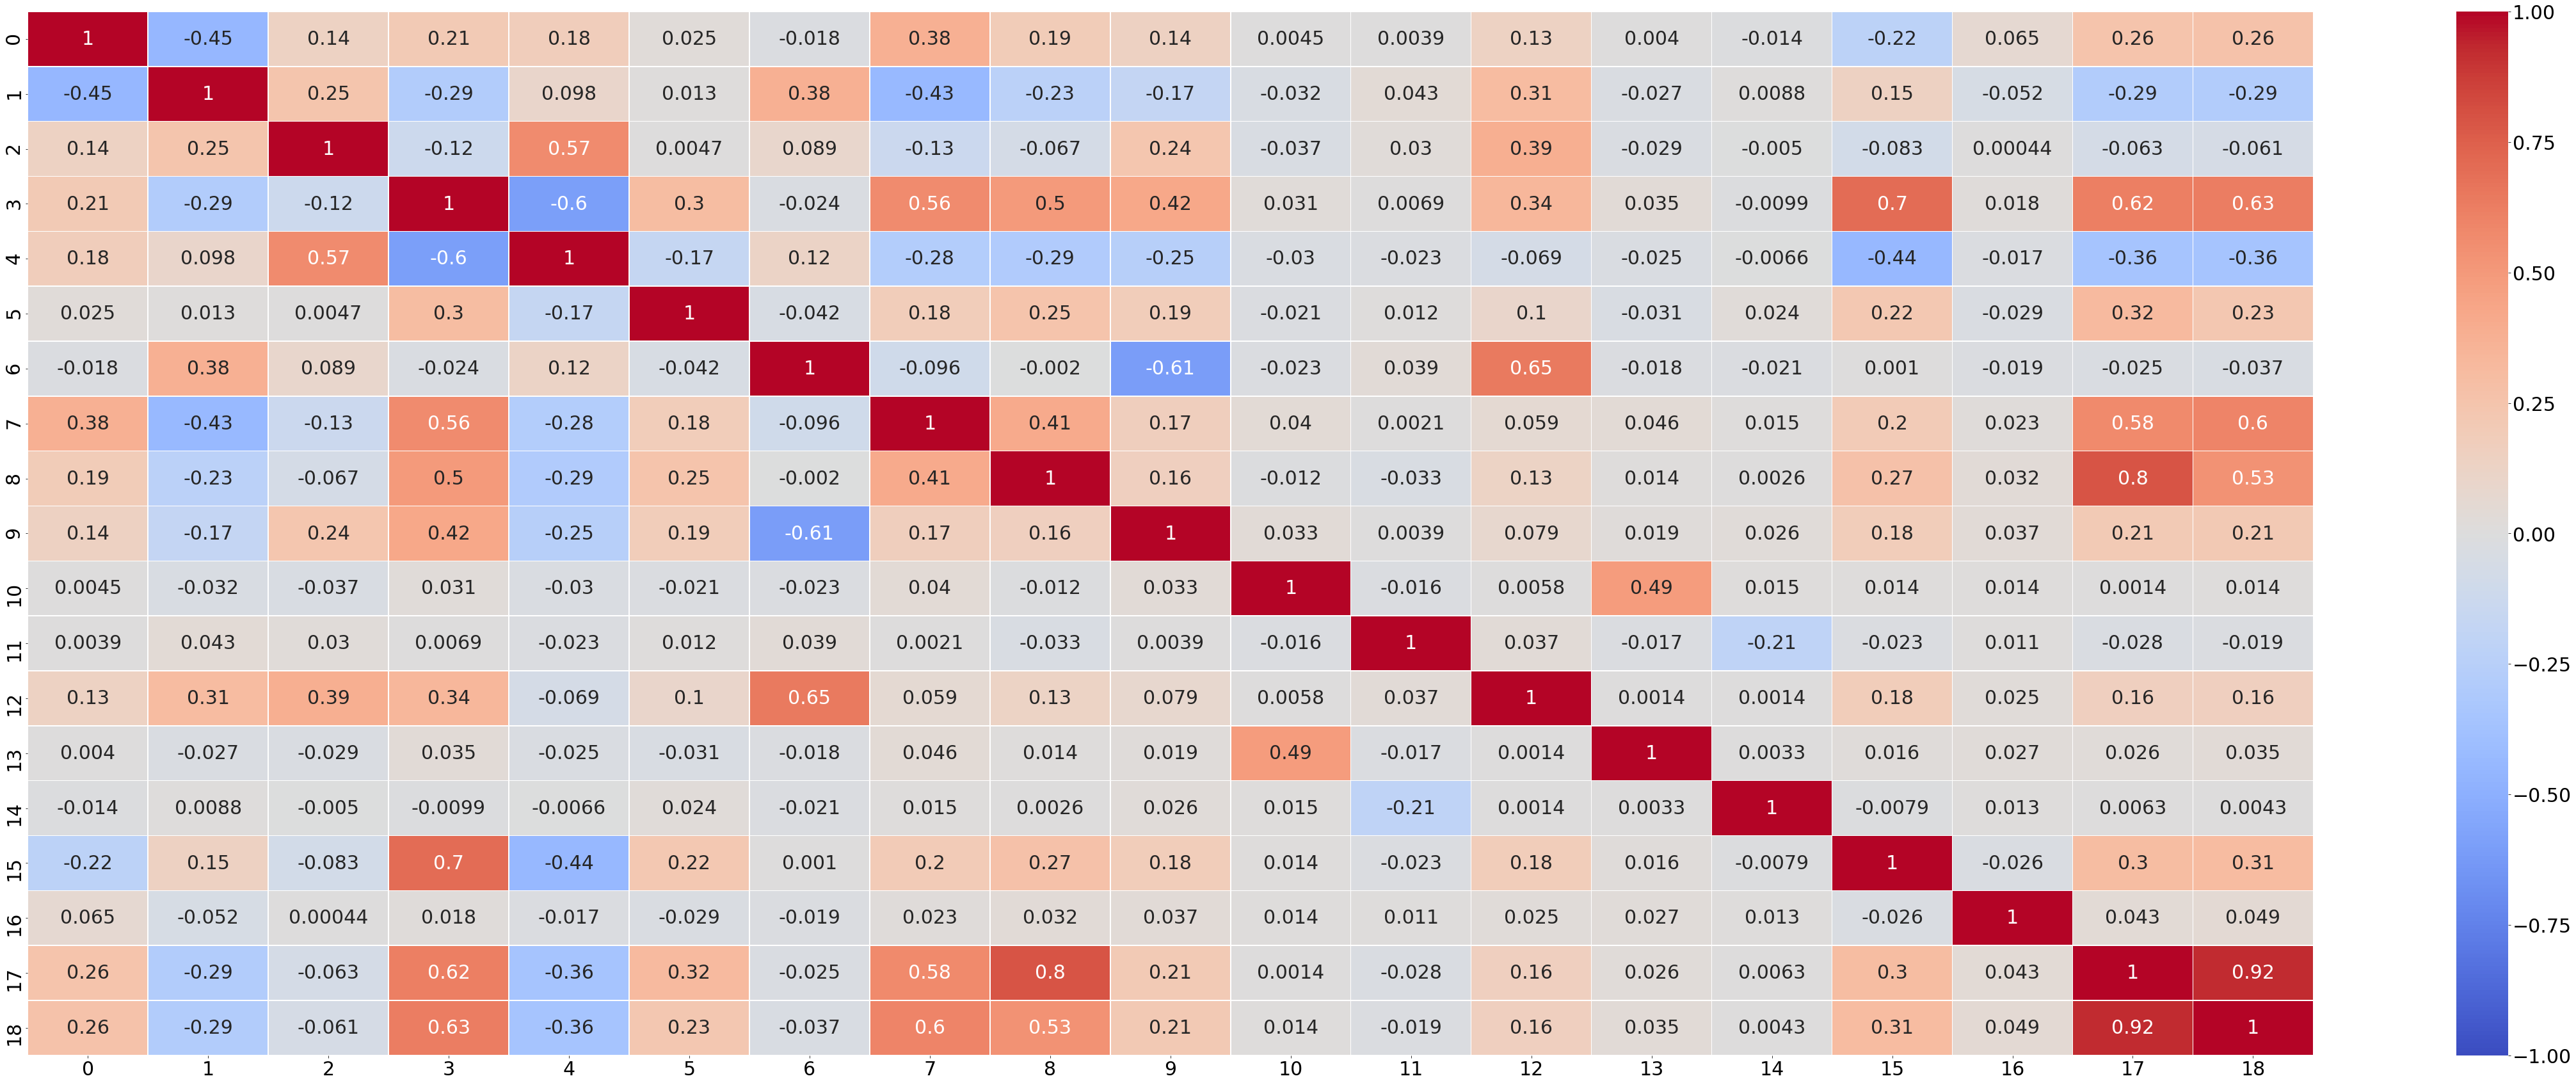

In [10]:
plt.figure(figsize=(80,30))
plt.rc('font',size=30)
sns.heatmap(reduced_corr_matrix,vmin = -1, vmax = 1, cmap = 'coolwarm',linewidths = .5, annot=True, annot_kws = {"size":30})
plt.show()

In [11]:
# 17,18,8 --> 8

axis = 1 #rows (0), columns (1)
obj = [17,18]
x_reduced = np.delete(x_reduced,obj,axis)
tx_reduced = np.c_[np.ones((y.shape[0], 1)), x_reduced]

In [12]:
number_features=x_reduced.shape[1]
reduced_corr_matrix = np.zeros((number_features,number_features))

for i in range(number_features):
    for j in range(number_features):
        corr = np.corrcoef(x_reduced[:,i], x_reduced[:,j])[1,0]
        reduced_corr_matrix[i][j]=corr

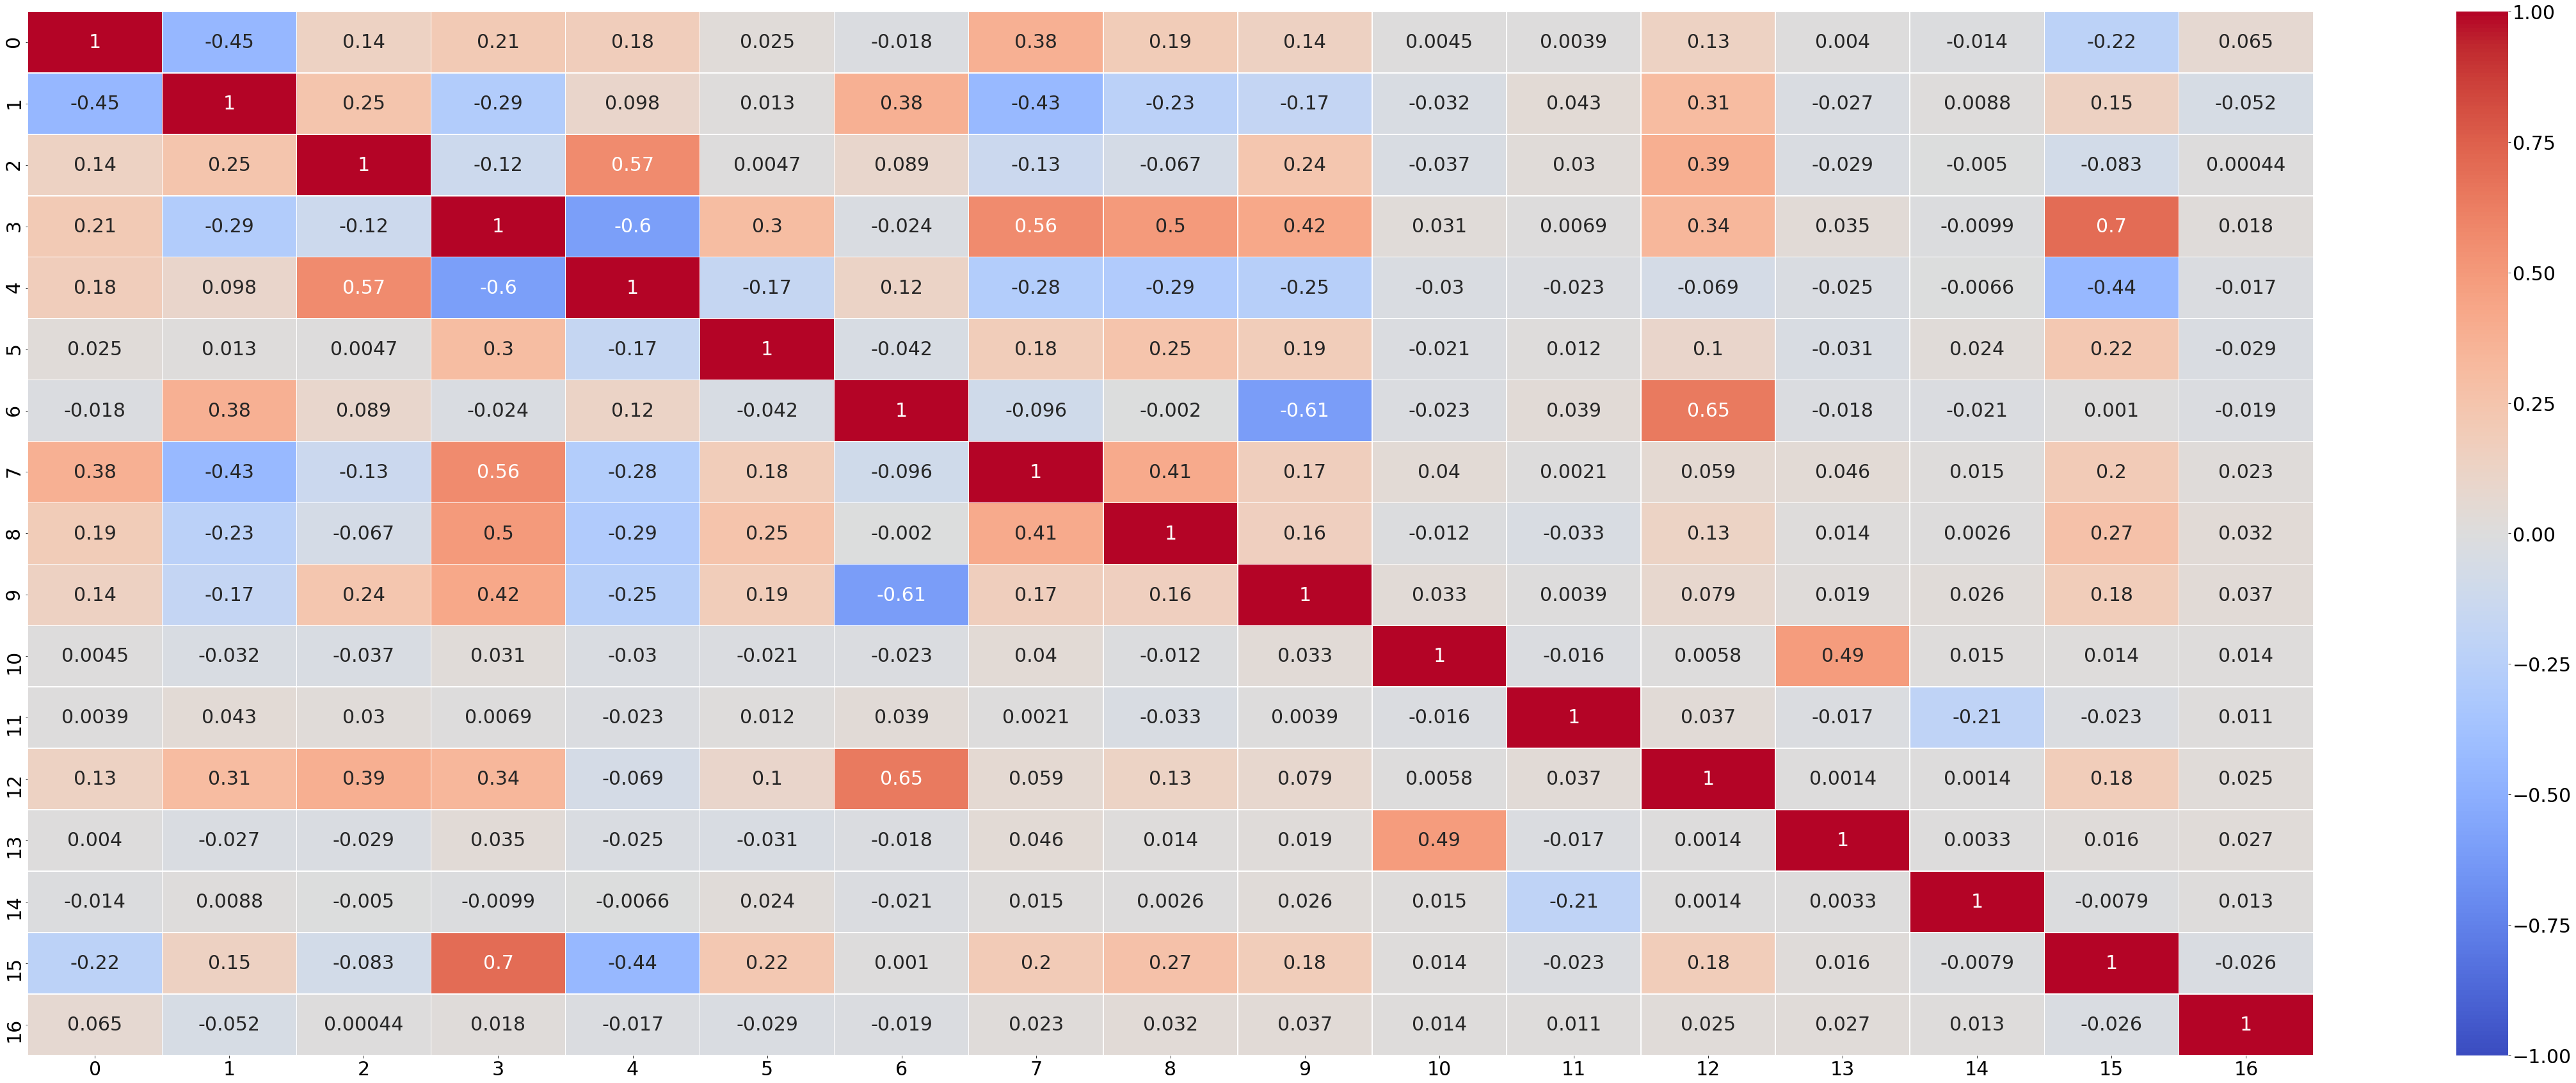

In [13]:
plt.figure(figsize=(80,30))
plt.rc('font',size=30)
sns.heatmap(reduced_corr_matrix,vmin = -1, vmax = 1, cmap = 'coolwarm',linewidths = .5, annot=True, annot_kws = {"size":30})
plt.show()

#it seems there are no correlated features anymore

### Linear regression

In [23]:
print(y.shape, x.shape)
np.seterr(divide = 'ignore') 
initial_w = np.zeros((tx.shape[1], 1))

(2000, 1) (2000, 30)


In [24]:
start_time = time.time()
max_iters=10
gamma=0.001

w_gd, loss_gd = mean_squared_error_gd(y, tx, initial_w, max_iters, gamma)
print("loss:", np.sqrt(2*loss_gd), "--- %s seconds ---" % (time.time() - start_time))

loss: 0.5626718289276555 --- 0.00356292724609375 seconds ---


In [25]:
k_indices = build_k_indices(y, 2, 1)
loss_train, loss_test = cross_validation_least_squares(y, tx, k_indices, 1)
print("train loss : ", loss_train, "test loss : ", loss_test)


train loss :  0.40090943285132863 test loss :  0.41172818398296773


In [26]:
k_indices = build_k_indices(y, 2, 1)
initial_w = np.zeros((tx.shape[1], 1))
initial_w += 0
print(type(y))
loss_train, loss_test = cross_validation_logistic_regression(y, tx, initial_w,  k_indices, 1)
print("train loss all features: ", loss_train, "test loss all features: ", loss_test)

<class 'numpy.ndarray'>
train loss all features:  1.1774091255946733 test loss all features:  0.6016658150660483


 the choice of lambda which leads to the best test rmse is 0.000000010 with a test rmse of 1.145


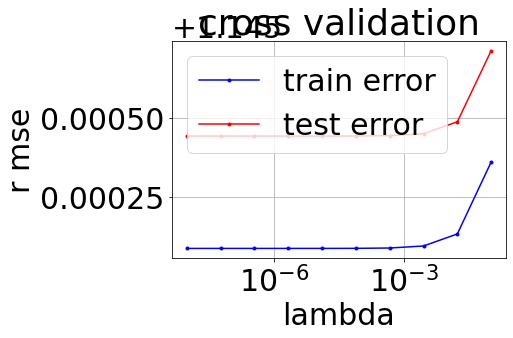

In [28]:
initial_w = np.zeros((tx.shape[1], 1))


best_lambda, best_rmse = find_best_lambda_reg_logistic_regression(tx, y, initial_w, 4, np.logspace(-8, -1, 10))

In [29]:
np.seterr(divide = 'ignore') 

initial_w = np.zeros((tx.shape[1], 1))

iter_num = 1000
gamma = 0.00001
w_lr, loss_lr = logistic_regression(y,tx, initial_w, iter_num, gamma)
print("loss with all the features", np.sqrt(2*loss_lr))

#print(w_ls, "\n", w_lr)
initial_w = np.zeros((tx_reduced.shape[1], 1))

w_lr, loss_lr = logistic_regression(y,tx_reduced, initial_w, iter_num, gamma)
print("loss with reduced feature matrix", np.sqrt(2*loss_lr))

loss with all the features 1.1774019104067897
loss with reduced feature matrix 1.1774040672102188


### Cross validation logistic regression

In [30]:
from cross_validation import *

In [31]:
k_indices = build_k_indices(y, 2, 1)
initial_w = np.zeros((tx.shape[1], 1))
initial_w += 0
loss_train, loss_test = cross_validation_logistic_regression(y, tx, initial_w,  k_indices, 1)
print("train loss all features: ", loss_train, "test loss all features: ", loss_test)

train loss all features:  1.1774091255946733 test loss all features:  0.6016658150660483


In [33]:
initial_w = np.zeros((tx_reduced.shape[1], 1))
initial_w += 0
loss_train, loss_test = cross_validation_logistic_regression(y, tx_reduced, initial_w,  k_indices, 1)
print("train loss reduced features: ", loss_train, "test loss reduced features: ", loss_test)

train loss reduced features:  1.1774093415443592 test loss reduced features:  0.6016662740178328


### Regularized logistic regression

In [37]:
np.seterr(divide = 'ignore') 

initial_w = np.zeros((tx.shape[1], 1))

lambda_ = 1
iters=2000
gamma=0.0001

w_lr, loss_lr = reg_logistic_regression(y,tx, lambda_, initial_w, iters, gamma)
print("loss with all features", np.sqrt(2*loss_lr))

loss with all features 1.1318684737388975


In [38]:
initial_w = np.zeros((tx_reduced.shape[1], 1))

w_lr, loss_lr = reg_logistic_regression(y,tx_reduced, lambda_, initial_w, iters, gamma)
print("loss with reduced features", np.sqrt(2*loss_lr))

loss with reduced features 1.1420407516156623


### Best lambda regularized logistic regression

 the choice of lambda which leads to the best test rmse is 1000.000000000 with a test rmse of 1.177


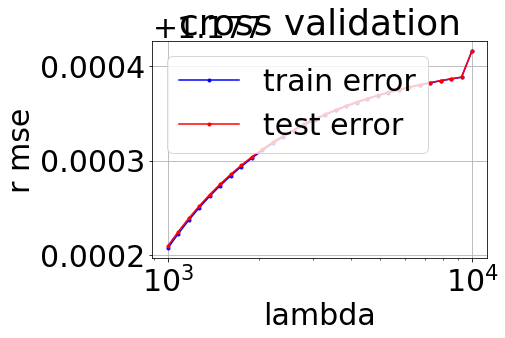

In [42]:
initial_w = np.zeros((tx.shape[1], 1))

best_lambda, best_rmse = find_best_lambda_reg_logistic_regression(tx, y, initial_w, 3, np.logspace(3, 4, 30))